# Spam Detection: Naive Bayes vs SVM

**Student Name:** Ricardo 
**Date:** 2/XX/2026

In this project, you'll:
1. Load a spam email dataset
2. Train a Naive Bayes classifier
3. Train an SVM classifier
4. Compare the results

<small><i>Note</i>: This project was created with the assistance of AI</small>

---

## Step 1: Import Libraries and Load Data

In [93]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from pathlib import Path

# Set random seed for reproducibility
np.random.seed(42)

In [94]:
# Load the dataset
df = pd.read_csv(Path(globals()['_dh'][0]).parent/'data'/'spam_data.csv')

# Display first few rows
print(df.head())

   word_free  word_money  word_winner  word_click  word_urgent  \
0   0.116603    0.081405     0.248621    0.107026     0.084280   
1   0.150017    0.202468     0.071720    0.227412     0.228002   
2   0.009429    0.190923     0.094307    0.152571     0.272270   
3   0.085727    0.129830     0.205633    0.099737     0.016976   
4   0.050113    0.050286     0.011001    0.220921     0.199141   

   num_exclamation  num_dollar  num_capitals  email_length  has_link  is_spam  
0         0.162809    0.042277      0.240659    101.836546  0.296066        0  
1         0.093779    0.123205      0.062907     90.571442  0.193681        0  
2         0.074788    0.123115      0.226665    130.369345  0.023094        0  
3         0.112176    0.283335      0.192520     98.526674  0.189685        0  
4         0.142389    0.253251      0.241701     96.637459  0.260481        0  


## Step 2: Preprocessing the Data
* Clean the data
* Split the data into training and test sets.
* Feature Scaling

In [95]:
label_col = "is_spam"
X = df.drop(columns=[label_col]).values
y = df[label_col].astype(int).values

In [96]:
# Split the data using a random state of 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

## Step 3: Train Naive Bayes Classifier

In [97]:
nb = GaussianNB()
nb.fit(X_train_s, y_train)
y_pred_nb = nb.predict(X_test_s)

In [98]:
metrics_nb = {
    "accuracy": accuracy_score(y_test, y_pred_nb),
    "precision": precision_score(y_test, y_pred_nb),
    "recall": recall_score(y_test, y_pred_nb),
    "f1": f1_score(y_test, y_pred_nb)
}

Display your confusion matrix and your classification report.

In [99]:
print("Naive Bayes confusion matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nNaive Bayes Classification report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes confusion matrix:
[[90  0]
 [ 0 60]]

Naive Bayes Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        60

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Step 4: Train k-Nearest Neighbors Classifier

In [100]:
k_range = range(1, 16)
cv_scores = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_s, y_train, cv=5, scoring="accuracy").mean()
    for k in k_range
]
best_k = k_range[int(np.argmax(cv_scores))]

Best k (by CV): 1


In [101]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_s, y_train)
y_pred_knn = knn.predict(X_test_s)

metrics_knn = {
    "accuracy": accuracy_score(y_test, y_pred_knn),
    "precision": precision_score(y_test, y_pred_knn),
    "recall": recall_score(y_test, y_pred_knn),
    "f1": f1_score(y_test, y_pred_knn)
}

Display your confusion matrix and classification report.

In [102]:
print("kNN confusion matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nkNN classification report:")
print(classification_report(y_test, y_pred_knn))

kNN confusion matrix:
[[90  0]
 [ 0 60]]

kNN classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        60

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Step 5: Train SVM Classifier

In [103]:
svm = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm.fit(X_train_s, y_train)
y_pred_svm = svm.predict(X_test_s)

In [104]:
metrics_svm = {
    "accuracy": accuracy_score(y_test, y_pred_svm),
    "precision": precision_score(y_test, y_pred_svm),
    "recall": recall_score(y_test, y_pred_svm),
    "f1": f1_score(y_test, y_pred_svm)
}

Display your confusion matrix and your classification report.

In [105]:
print("SVM confusion matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nSVM classification report:")
print(classification_report(y_test, y_pred_svm))

SVM confusion matrix:
[[90  0]
 [ 0 60]]

SVM classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        60

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



## Step 6: Compare the Models
* Create graphs that compare model results
* Make calculations to compare model results

            accuracy  precision  recall   f1
NaiveBayes       1.0        1.0     1.0  1.0
kNN              1.0        1.0     1.0  1.0
SVM              1.0        1.0     1.0  1.0


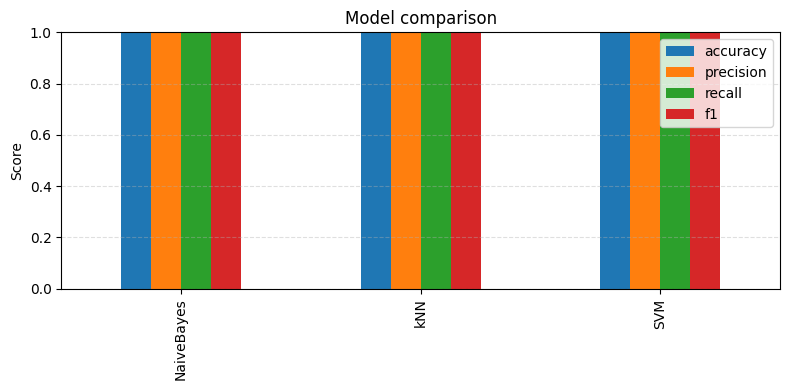

In [106]:
results = pd.DataFrame({
    "NaiveBayes": metrics_nb,
    "kNN": metrics_knn,
    "SVM": metrics_svm
}).T

print(results.round(4))

ax = results[["accuracy", "precision", "recall", "f1"]].plot.bar(figsize=(8,4))
ax.set_title("Model comparison")
ax.set_ylim(0,1)
ax.set_ylabel("Score")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

Discuss the results of your comparison.

They all seem to have returned the same thing.
Only difference might be how long each took to do so, or how long it took to implement them

## Step 7: Answer Discussion Questions

Based on your results, answer the following questions:

### Question 1: Which model performed better overall? Why do you think so?

**Your Answer:**

I don't think any of them performed relatively better that the others. Since they all returned the same results.
It could be I implemented something incorrectly and that is why I am getting the same results for each one.

---

### Question 2: What is the difference between accuracy and precision? Which is more important for spam detection?

**Your Answer:**

The difference between them is that accuracy, just shows you the overall correctness while precision,
shows you the the trustworthiness of positive predictions. I believe that precision is more important for spam detection

---

### Question 3: When would you choose Naive Bayes over kNN or SVM in a real-world application?

**Your Answer:**

When we need fast training / predictions. 

---

### Question 4: What are the key assumptions of Naive Bayes? Do you think they hold true for this spam detection problem?

**Your Answer:**

We assume every feature is independent. I don't think they hold true in these cases as many different features can be interconnected,
in cases like these.

---

### Question 5: How did you determine your value for $k$ in the kNN model?

**Your Answer:**

I tried to calculate the square root of n, n being the number of data points then getting the closest prime number to that calculation.

---

## Summary

In this project, you:
- ✅ Loaded and split a spam detection dataset
- ✅ Trained a Naive Bayes classifier
- ✅ Trained an SVM classifier  
- ✅ Compared both models using multiple metrics
- ✅ Analyzed the results

**Key Takeaways:**
1. Different algorithms can produce different results on the same data
2. Multiple metrics (accuracy, precision, recall) give a complete picture
3. Both Naive Bayes and SVM are effective for classification tasks
4. The choice of algorithm depends on the specific requirements of your problem